In [1]:
#data loading
import pandas as pd
filename="/content/restaurant_inspections.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames             business_name  inspection_score  Year  \
0             1             MCGINLEYS PUB                94  2017   
1             2            VILLAGE INN #1                86  2015   
2             3            RONNIE SUSHI 2                80  2016   
3             4  FRED MEYER - RETAIL FISH                96  2003   
4             5                 PHO GRILL                83  2017   
...         ...                       ...               ...   ...   
27173     27174               TWIN DRAGON                90  2018   
27174     27175               TWIN DRAGON                90  2018   
27175     27176               TWIN DRAGON                90  2018   
27176     27177               TWIN DRAGON                90  2018   
27177     27178               TWIN DRAGON                90  2018   

       NumberofLocations  Weekend  
0                      9    False  
1                     66    False  
2                     79    False  
3                     86   

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
business_name,0
inspection_score,0
Year,0
NumberofLocations,0
Weekend,0


In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="inspection_score"

#transform string into int
transformColumns={1,5}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  business_name  inspection_score  Year  NumberofLocations  \
0             1            955                94  2017                  9   
1             2           1538                86  2015                 66   
2             3           1215                80  2016                 79   
3             4            636                96  2003                 86   
4             5           1116                83  2017                 53   
...         ...            ...               ...   ...                ...   
27173     27174           1501                90  2018                127   
27174     27175           1501                90  2018                127   
27175     27176           1501                90  2018                127   
27176     27177           1501                90  2018                127   
27177     27178           1501                90  2018                127   

       Weekend  
0            0  
1            0  
2            0  
3      

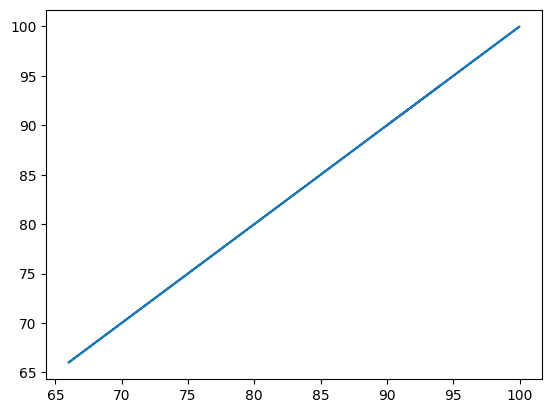

In [4]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 27178 artists>

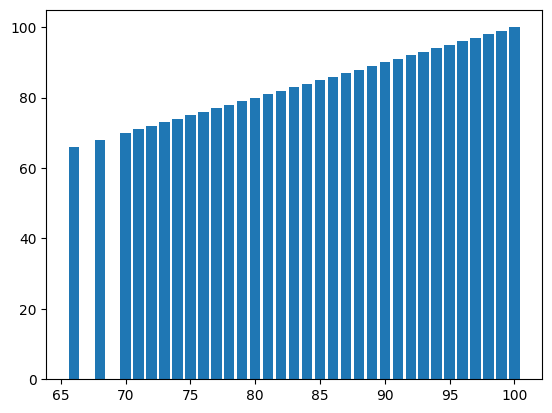

In [5]:
plt.bar(a[a.columns[2]],a[str(target)])

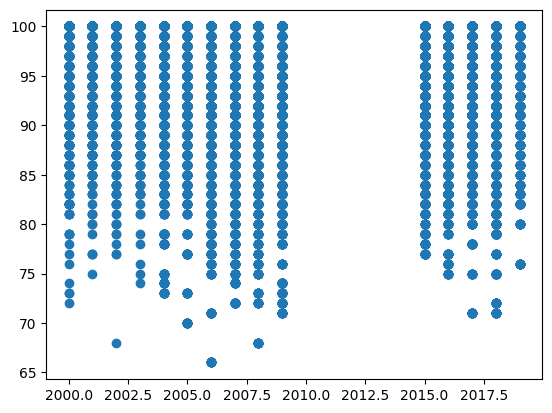

In [6]:
plt.scatter(a[a.columns[3]], a[str(target)])

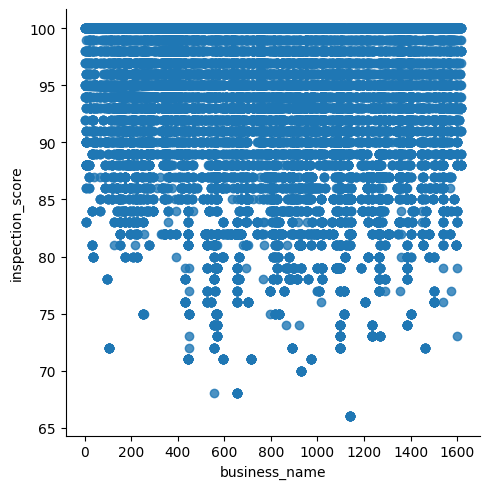

In [8]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="business_name",y=str(target),data=a)

<Axes: xlabel='NumberofLocations', ylabel='inspection_score'>

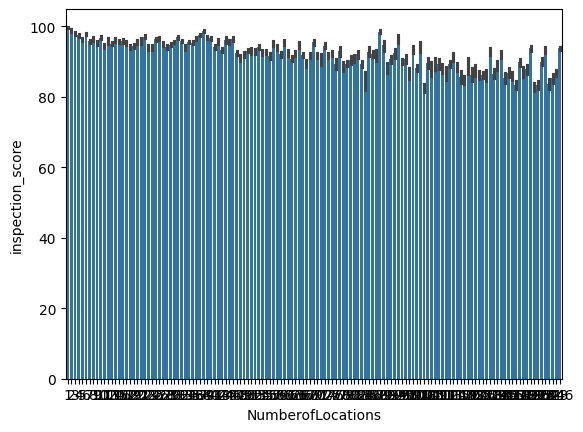

In [9]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='NumberofLocations', ylabel='inspection_score'>

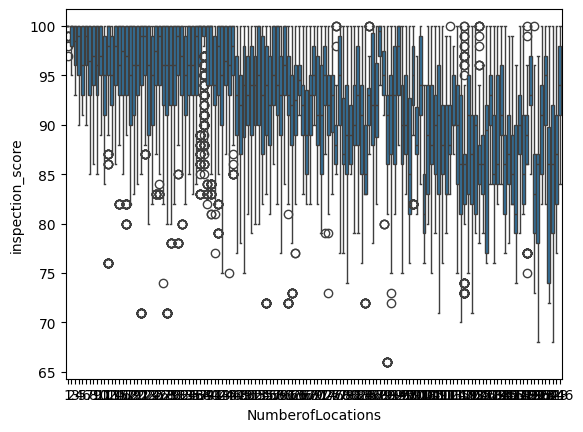

In [10]:
sns.boxplot(x=a.columns[4],y=str(target),data=a)

<ipython-input-11-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='inspection_score', ylabel='Density'>

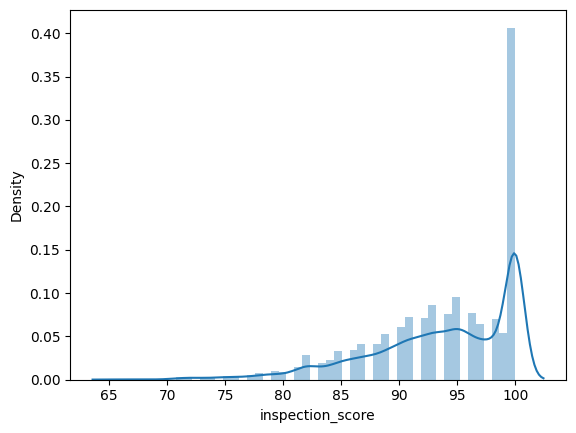

In [11]:
sns.distplot(a[str(target)])

<Axes: xlabel='Year', ylabel='Density'>

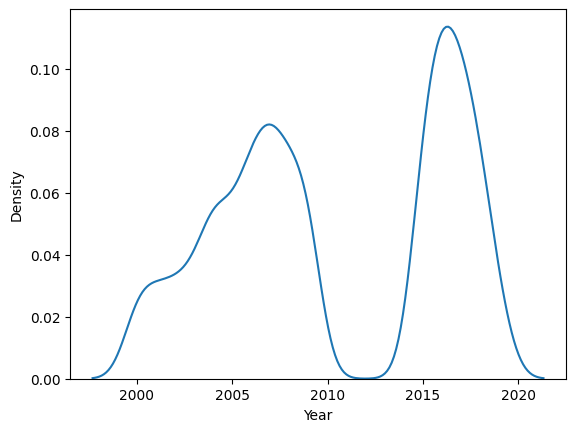

In [12]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='inspection_score', ylabel='count'>

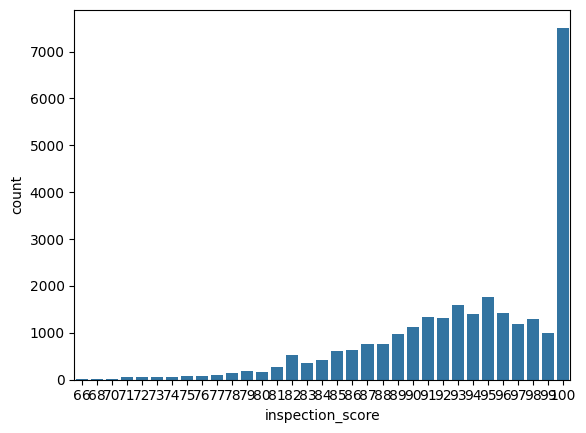

In [13]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

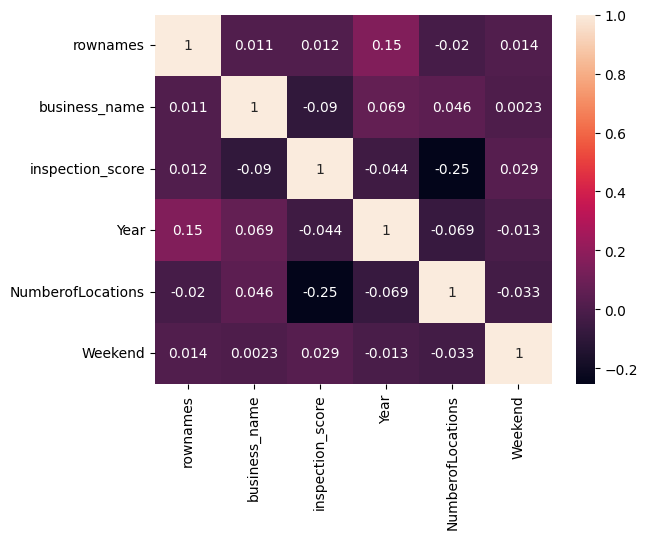

In [14]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

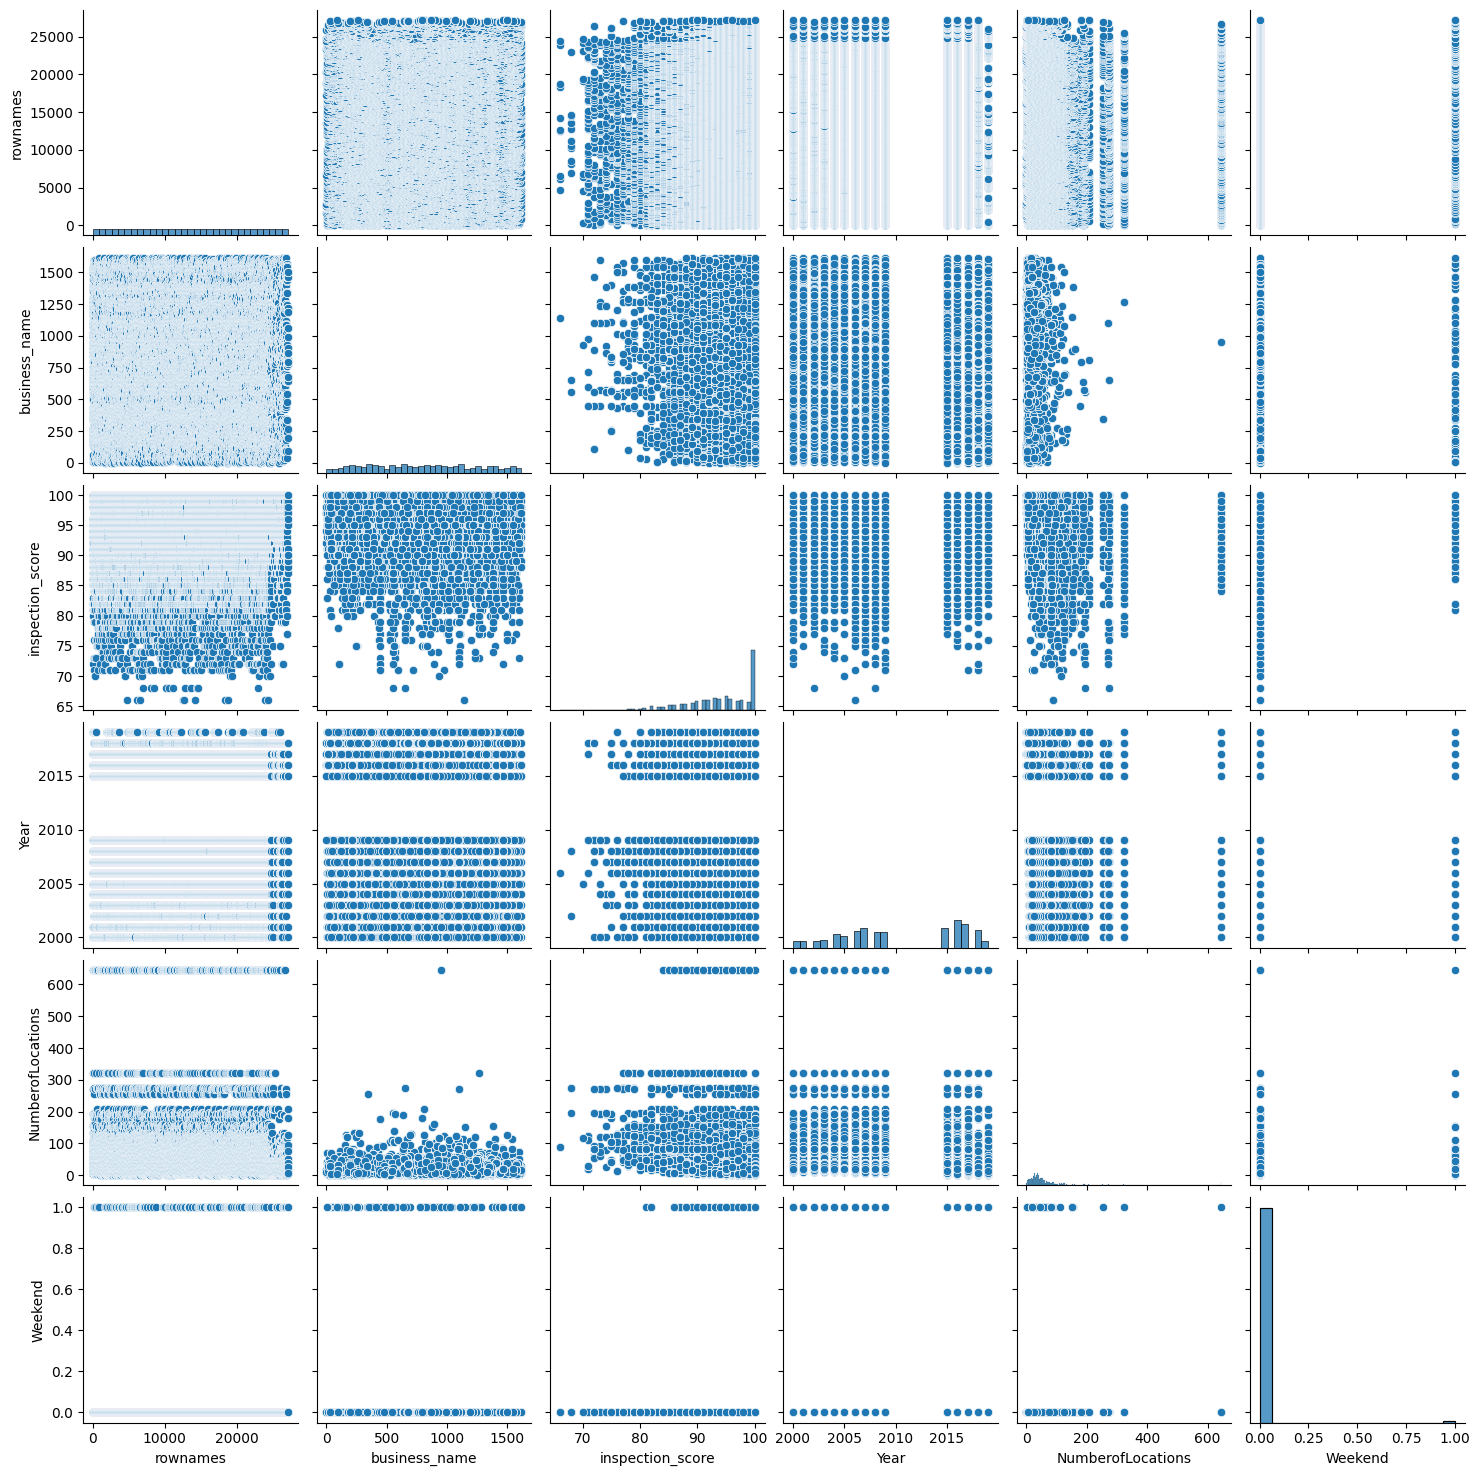

In [15]:
sns.pairplot(data=a)

In [16]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  business_name  Year  NumberofLocations  Weekend
0             1            955  2017                  9        0
1             2           1538  2015                 66        0
2             3           1215  2016                 79        0
3             4            636  2003                 86        0
4             5           1116  2017                 53        0
...         ...            ...   ...                ...      ...
27173     27174           1501  2018                127        0
27174     27175           1501  2018                127        0
27175     27176           1501  2018                127        0
27176     27177           1501  2018                127        0
27177     27178           1501  2018                127        0

[27178 rows x 5 columns]


In [17]:
print(y)

0        94
1        86
2        80
3        96
4        83
         ..
27173    90
27174    90
27175    90
27176    90
27177    90
Name: inspection_score, Length: 27178, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
print(x_train)

       rownames  business_name  Year  NumberofLocations  Weekend
4955       4956           1602  2016                  4        0
16712     16713            387  2015                 32        0
4250       4251            347  2001                254        0
1701       1702           1218  2017                 14        0
16053     16054            838  2001                 28        0
...         ...            ...   ...                ...      ...
12142     12143            853  2007                 60        0
1620       1621            350  2008                 56        0
13972     13973           1056  2004                 50        0
10225     10226            602  2006                 28        0
20349     20350            281  2004                 54        0

[21742 rows x 5 columns]


In [20]:
print(y_train)

4955      96
16712    100
4250      95
1701      92
16053     90
        ... 
12142     89
1620      93
13972     96
10225    100
20349     99
Name: inspection_score, Length: 21742, dtype: int64


In [21]:
print(x_test)

       rownames  business_name  Year  NumberofLocations  Weekend
12677     12678            880  2017                  4        0
24722     24723            178  2017                 11        0
20546     20547            956  2003                 35        0
9408       9409            248  2015                 55        0
23422     23423            207  2008                 81        0
...         ...            ...   ...                ...      ...
19253     19254           1037  2008                 34        0
9267       9268           1246  2015                 15        0
26561     26562            124  2018                 32        0
23641     23642            456  2007                 19        0
12856     12857            311  2004                 32        0

[5436 rows x 5 columns]


In [22]:
print(y_test)

12677    100
24722     98
20546     95
9408      92
23422     84
        ... 
19253     90
9267      90
26561    100
23641    100
12856     96
Name: inspection_score, Length: 5436, dtype: int64


In [23]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [24]:
print(ypred)

[94.2692756  95.0331954  94.5683234  ... 94.65283221 95.19171026
 95.13569   ]


In [26]:
print(model.predict([[12678,880,2017,4,0]]))

[94.2692756]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [28]:
print(ypred)

[ 93. 100.  92. ... 100. 100.  95.]


In [29]:
print(model.predict([[12678,880,2017,4,0]]))

[94.2692756]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [31]:
print(ypred)

[96.38 98.5  94.71 ... 98.58 98.92 98.29]


In [32]:
print(model.predict([[12678,880,2017,4,0]]))

[94.2692756]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
